In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn import hmm
import seaborn as sns

In [11]:
data_aapl= pd.read_csv("Financial-Data/stocks/AAPL.csv")
data_msft= pd.read_csv("Financial-Data/stocks/MSFT.csv")
data_amzn= pd.read_csv("Financial-Data/stocks/AMZN.csv")
data_googl= pd.read_csv("Financial-Data/stocks/GOOGL.csv")
data_nvda= pd.read_csv("Financial-Data/stocks/NVDA.csv")

#last 2000 rows
data_aapl = data_aapl[-2000:]
data_msft = data_msft[-2000:]
data_amzn = data_amzn[-2000:]
data_googl = data_googl[-2000:]
data_nvda = data_nvda[-2000:]

In [12]:
#converting the date column to datetime
data_aapl['Date'] = pd.to_datetime(data_aapl['Date'])
data_msft['Date'] = pd.to_datetime(data_msft['Date'])
data_amzn['Date'] = pd.to_datetime(data_amzn['Date'])
data_googl['Date'] = pd.to_datetime(data_googl['Date'])
data_nvda['Date'] = pd.to_datetime(data_nvda['Date'])

#column of close log difference
data_aapl['Close_logdiff'] = (np.log(data_aapl['Close'])).diff()
data_msft['Close_logdiff'] = (np.log(data_msft['Close'])).diff()
data_amzn['Close_logdiff'] = (np.log(data_amzn['Close'])).diff()
data_googl['Close_logdiff'] = (np.log(data_googl['Close'])).diff()
data_nvda['Close_logdiff'] = (np.log(data_nvda['Close'])).diff()


#normalize the data
data_aapl['Close_logdiff'] = (data_aapl['Close_logdiff'] - data_aapl['Close_logdiff'].mean()) / data_aapl['Close_logdiff'].std()
data_msft['Close_logdiff'] = (data_msft['Close_logdiff'] - data_msft['Close_logdiff'].mean()) / data_msft['Close_logdiff'].std()
data_amzn['Close_logdiff'] = (data_amzn['Close_logdiff'] - data_amzn['Close_logdiff'].mean()) / data_amzn['Close_logdiff'].std()
data_googl['Close_logdiff'] = (data_googl['Close_logdiff'] - data_googl['Close_logdiff'].mean()) / data_googl['Close_logdiff'].std()
data_nvda['Close_logdiff'] = (data_nvda['Close_logdiff'] - data_nvda['Close_logdiff'].mean()) / data_nvda['Close_logdiff'].std()

#filling NA values with the previous value of the column
data_aapl['Close_logdiff'] = data_aapl['Close_logdiff'].fillna(method='bfill')
data_msft['Close_logdiff'] = data_msft['Close_logdiff'].fillna(method='bfill')
data_amzn['Close_logdiff'] = data_amzn['Close_logdiff'].fillna(method='bfill')
data_googl['Close_logdiff'] = data_googl['Close_logdiff'].fillna(method='bfill')
data_nvda['Close_logdiff'] = data_nvda['Close_logdiff'].fillna(method='bfill')

/tmp/ipykernel_33702/2434168626.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_aapl['Close_logdiff'] = data_aapl['Close_logdiff'].fillna(method='bfill')
/tmp/ipykernel_33702/2434168626.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_msft['Close_logdiff'] = data_msft['Close_logdiff'].fillna(method='bfill')
/tmp/ipykernel_33702/2434168626.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_amzn['Close_logdiff'] = data_amzn['Close_logdiff'].fillna(method='bfill')
/tmp/ipykernel_33702/2434168626.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_googl['Close_logdiff'] = data_googl['Close_logdiff'].fillna(me

In [13]:
X_aapl=data_aapl[['Close_logdiff']].to_numpy()
X_msft=data_msft[['Close_logdiff']].to_numpy()
X_amzn=data_amzn[['Close_logdiff']].to_numpy()
X_googl=data_googl[['Close_logdiff']].to_numpy()
X_nvda=data_nvda[['Close_logdiff']].to_numpy()

n_states=2

hmm_model_aapl = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100).fit(X_aapl)
hmm_model_msft = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100).fit(X_msft)
hmm_model_amzn = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=200).fit(X_amzn)
hmm_model_googl = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100).fit(X_googl)
hmm_model_nvda = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=100).fit(X_nvda)

hidden_states_aapl = hmm_model_aapl.predict(X_aapl)
hidden_states_msft = hmm_model_msft.predict(X_msft)
hidden_states_amzn = hmm_model_amzn.predict(X_amzn)
hidden_states_googl = hmm_model_googl.predict(X_googl)
hidden_states_nvda = hmm_model_nvda.predict(X_nvda)

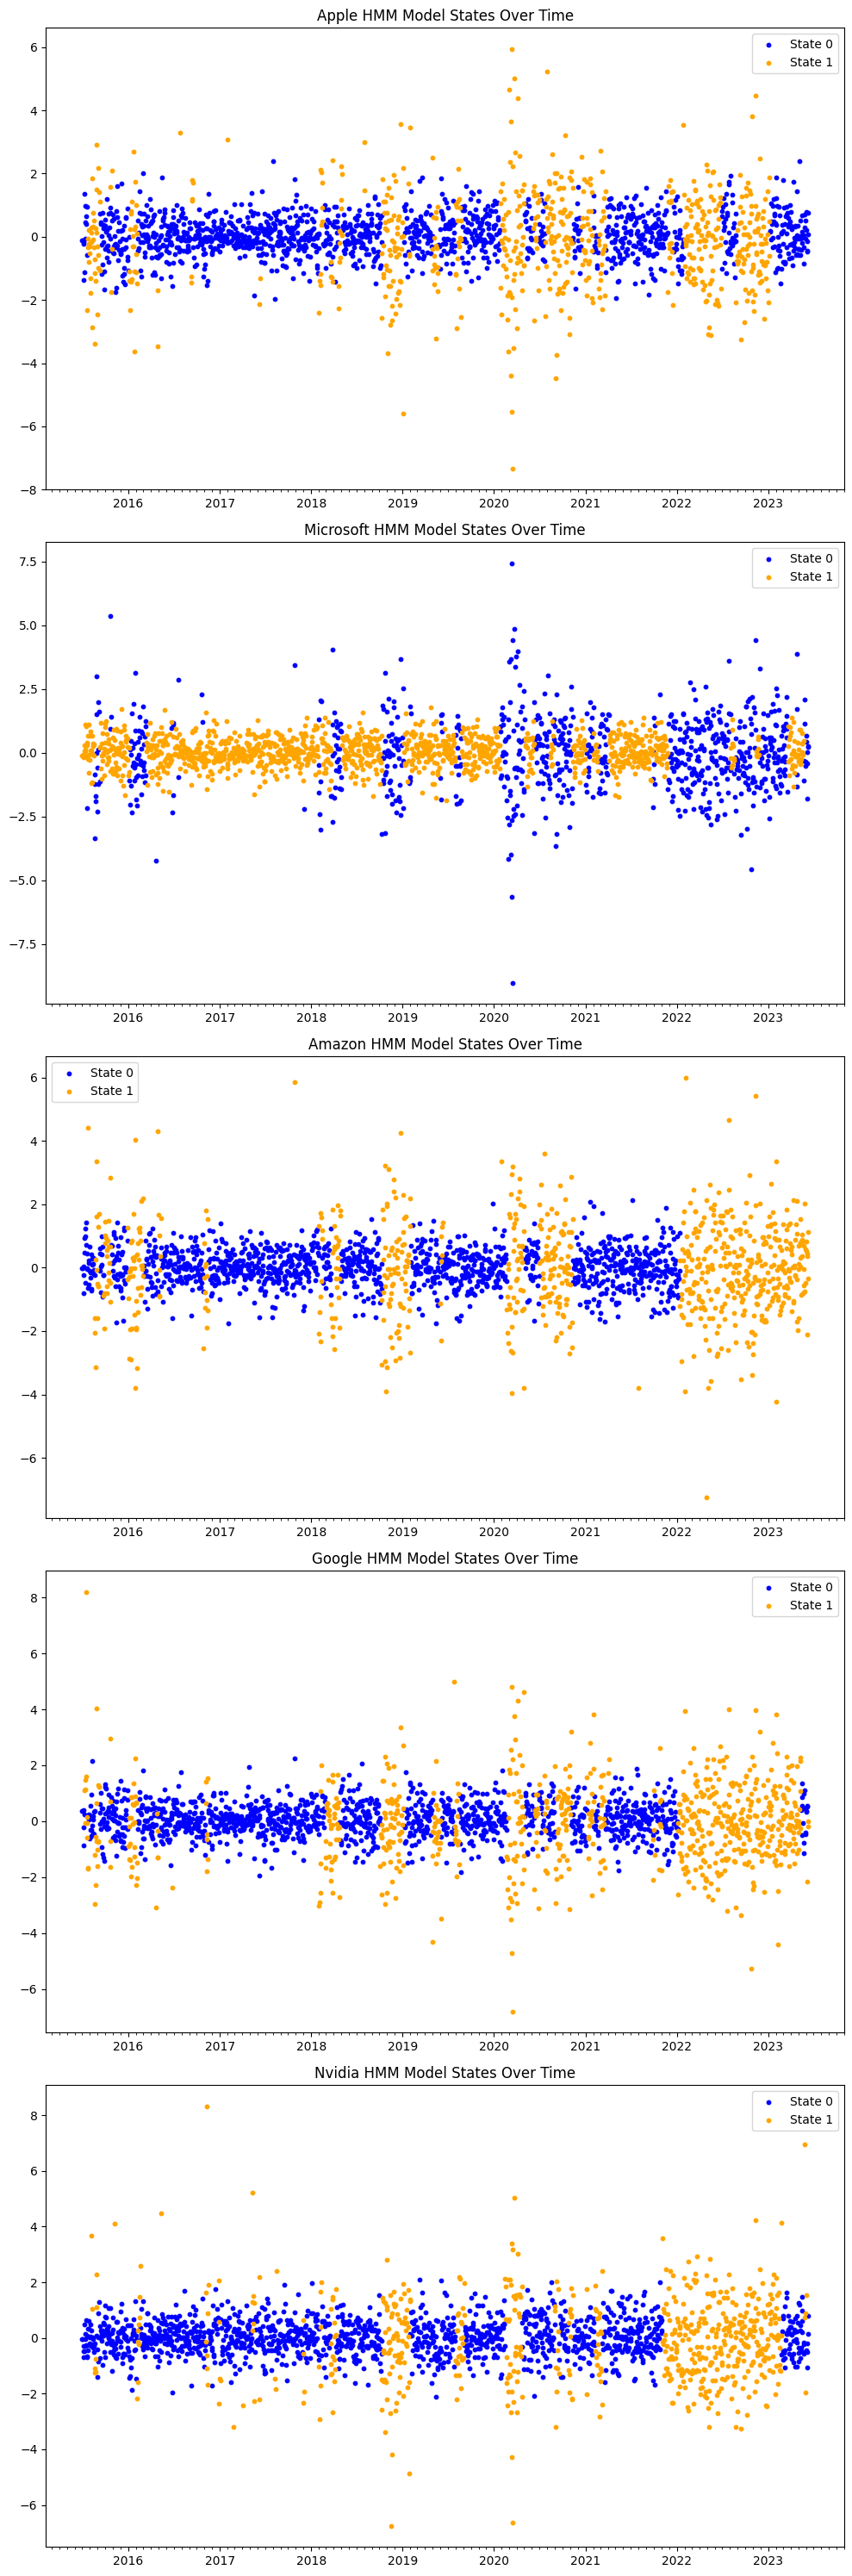

In [14]:
fig, ax = plt.subplots(5, figsize=(10, 30)) 

# Assuming day, close_diff, and hidden_states are defined elsewhere in your code
# Generate colors based on the number of components in the HMM model
colours = {'orange','blue'}

for i, colour in enumerate(colours):
    # Filter data for the current state
    mask_aapl = hidden_states_aapl == i
    mask_msft = hidden_states_msft == i
    mask_amzn = hidden_states_amzn == i
    mask_googl = hidden_states_googl == i
    mask_nvda = hidden_states_nvda == i
    ax[0].scatter(data_aapl['Date'][mask_aapl], data_aapl['Close_logdiff'][mask_aapl], color=colour, s=10, label=f"State {i}")
    ax[1].scatter(data_msft['Date'][mask_msft], data_msft['Close_logdiff'][mask_msft], color=colour, s=10, label=f"State {i}")
    ax[2].scatter(data_amzn['Date'][mask_amzn], data_amzn['Close_logdiff'][mask_amzn], color=colour, s=10, label=f"State {i}")
    ax[3].scatter(data_googl['Date'][mask_googl], data_googl['Close_logdiff'][mask_googl], color=colour, s=10, label=f"State {i}")  
    ax[4].scatter(data_nvda['Date'][mask_nvda], data_nvda['Close_logdiff'][mask_nvda], color=colour, s=10, label=f"State {i}")
    
    # Optionally, set the title for the plot
    ax[0].set_title("Apple HMM Model States Over Time")
    ax[1].set_title("Microsoft HMM Model States Over Time")
    ax[2].set_title("Amazon HMM Model States Over Time")
    ax[3].set_title("Google HMM Model States Over Time")
    ax[4].set_title("Nvidia HMM Model States Over Time")

    ax[0].xaxis.set_major_locator(YearLocator())
    ax[1].xaxis.set_major_locator(YearLocator())
    ax[2].xaxis.set_major_locator(YearLocator())
    ax[3].xaxis.set_major_locator(YearLocator())
    ax[4].xaxis.set_major_locator(YearLocator())

    ax[0].xaxis.set_minor_locator(MonthLocator())
    ax[1].xaxis.set_minor_locator(MonthLocator())
    ax[2].xaxis.set_minor_locator(MonthLocator())
    ax[3].xaxis.set_minor_locator(MonthLocator())
    ax[4].xaxis.set_minor_locator(MonthLocator())


# Add legend
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

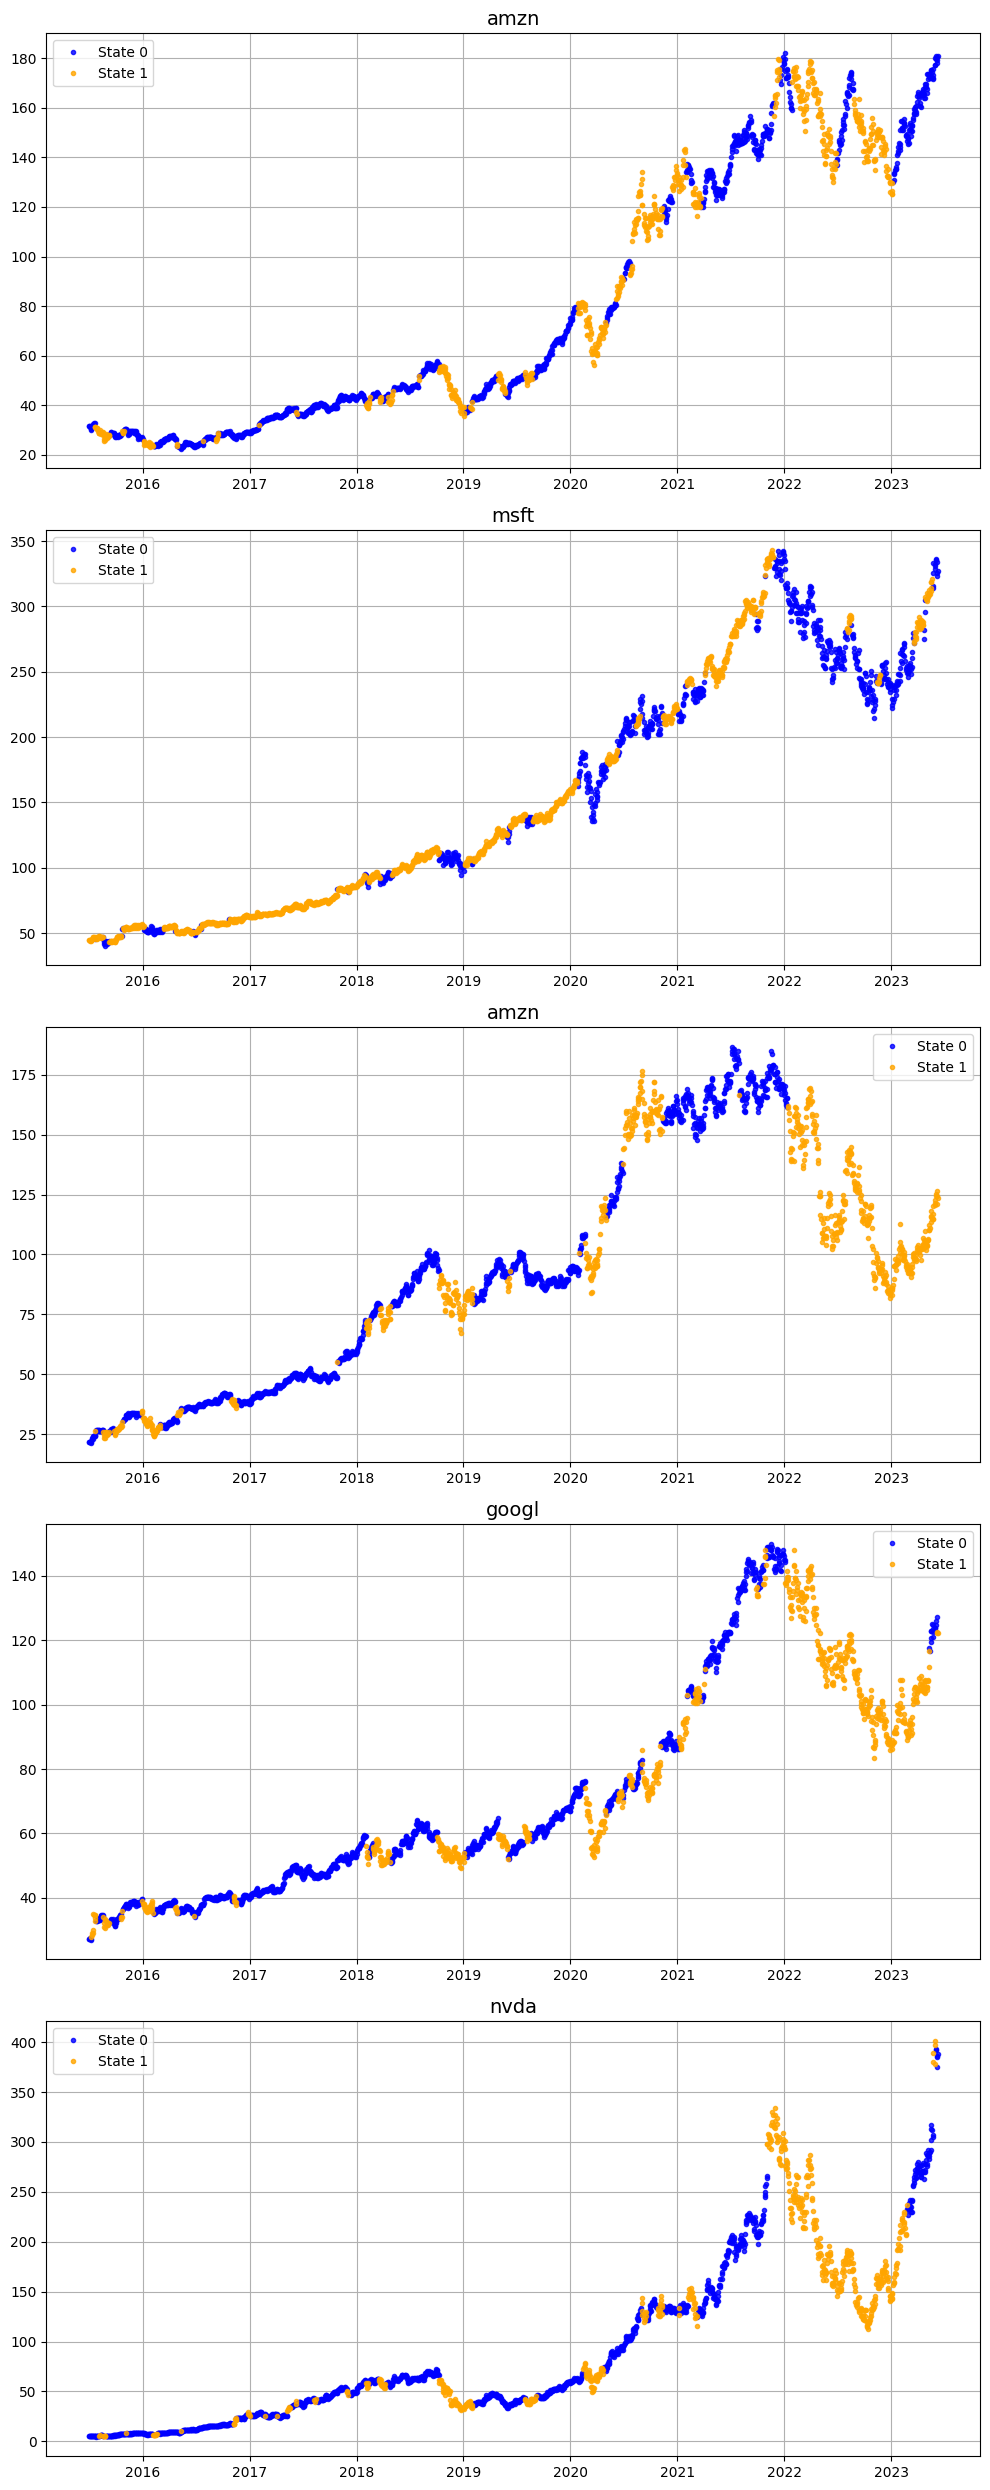

In [15]:
fig, axs = plt.subplots(5, figsize=(10, 25))  # Adjust figsize as needed for 5 subplots

for i, colour in enumerate(colours):
    # Filter data for the current state
    mask_aapl = hidden_states_aapl == i
    mask_msft = hidden_states_msft == i
    mask_amzn = hidden_states_amzn == i
    mask_googl = hidden_states_googl == i
    mask_nvda = hidden_states_nvda == i
    axs[0].plot(data_aapl['Date'][mask_aapl], data_aapl['Close'][mask_aapl], '.', color=colour, alpha=0.8, label=f"State {i}")
    axs[1].plot(data_msft['Date'][mask_msft], data_msft['Close'][mask_msft], '.', color=colour, alpha=0.8, label=f"State {i}")
    axs[2].plot(data_amzn['Date'][mask_amzn], data_amzn['Close'][mask_amzn], '.', color=colour, alpha=0.8, label=f"State {i}")
    axs[3].plot(data_googl['Date'][mask_googl], data_googl['Close'][mask_googl], '.', color=colour, alpha=0.8, label=f"State {i}")
    axs[4].plot(data_nvda['Date'][mask_nvda], data_nvda['Close'][mask_nvda], '.', color=colour, alpha=0.8, label=f"State {i}")

axs[0].set_title("amzn", fontsize=14)  
axs[1].set_title("msft", fontsize=14)
axs[2].set_title("amzn", fontsize=14)
axs[3].set_title("googl", fontsize=14)
axs[4].set_title("nvda", fontsize=14)


axs[0].legend()  
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[3].grid(True)
axs[4].grid(True)



plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


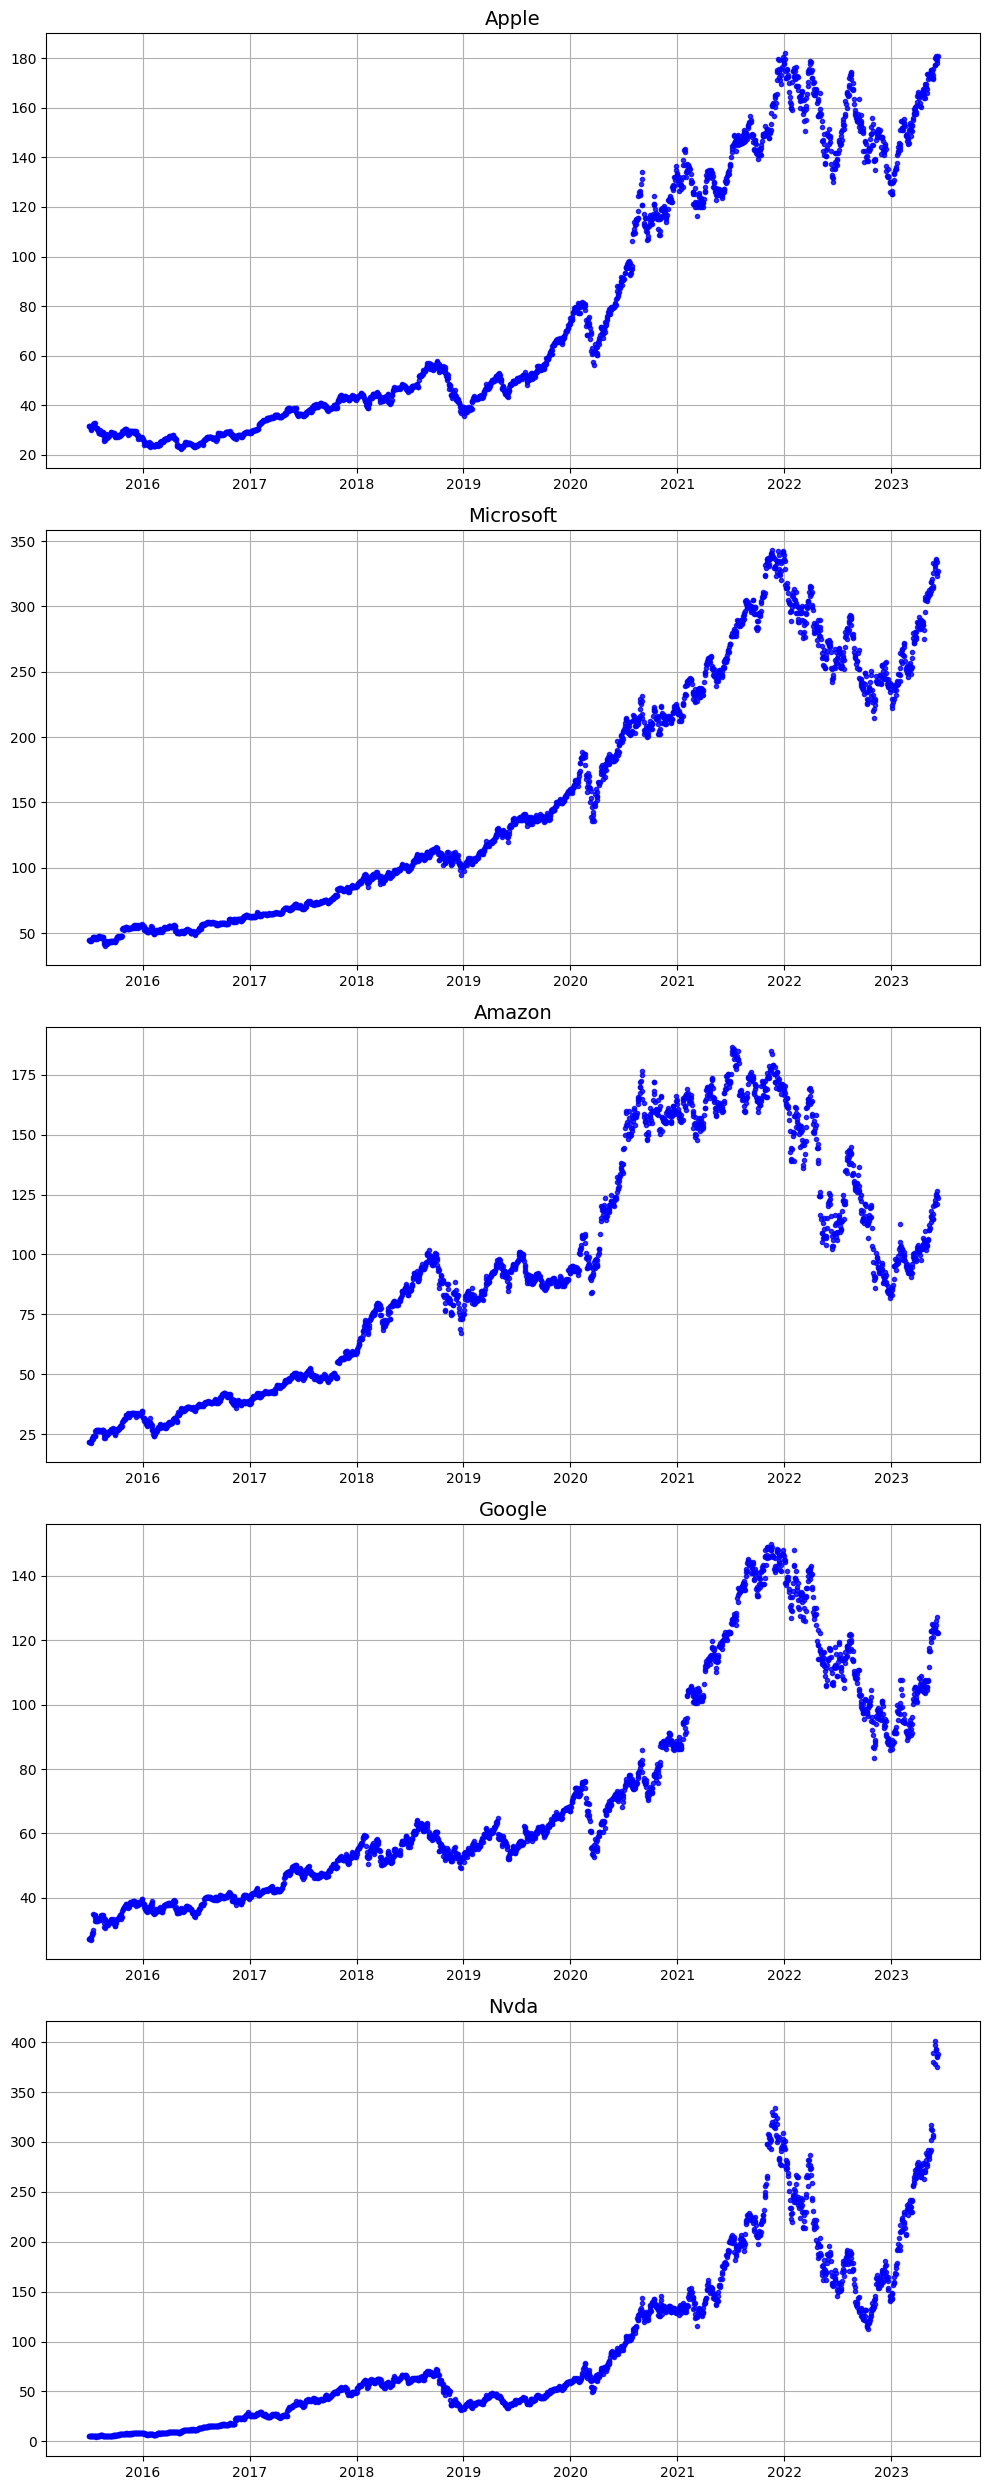

In [16]:
#put 5 subplots in orizontal

fig, axs = plt.subplots(5, figsize=(10, 25))  # Adjust figsize as needed for 5 subplots
colour="blue"
axs[0].plot(data_aapl['Date'], data_aapl['Close'], '.', color=colour, alpha=0.8)
axs[1].plot(data_msft['Date'], data_msft['Close'], '.', color=colour, alpha=0.8)
axs[2].plot(data_amzn['Date'], data_amzn['Close'], '.', color=colour, alpha=0.8)
axs[3].plot(data_googl['Date'], data_googl['Close'], '.', color=colour, alpha=0.8)
axs[4].plot(data_nvda['Date'], data_nvda['Close'], '.', color=colour, alpha=0.8)

axs[0].set_title("Apple", fontsize=14)  
axs[1].set_title("Microsoft", fontsize=14)
axs[2].set_title("Amazon", fontsize=14)
axs[3].set_title("Google", fontsize=14)
axs[4].set_title("Nvda", fontsize=14)

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[3].grid(True)
axs[4].grid(True)



plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


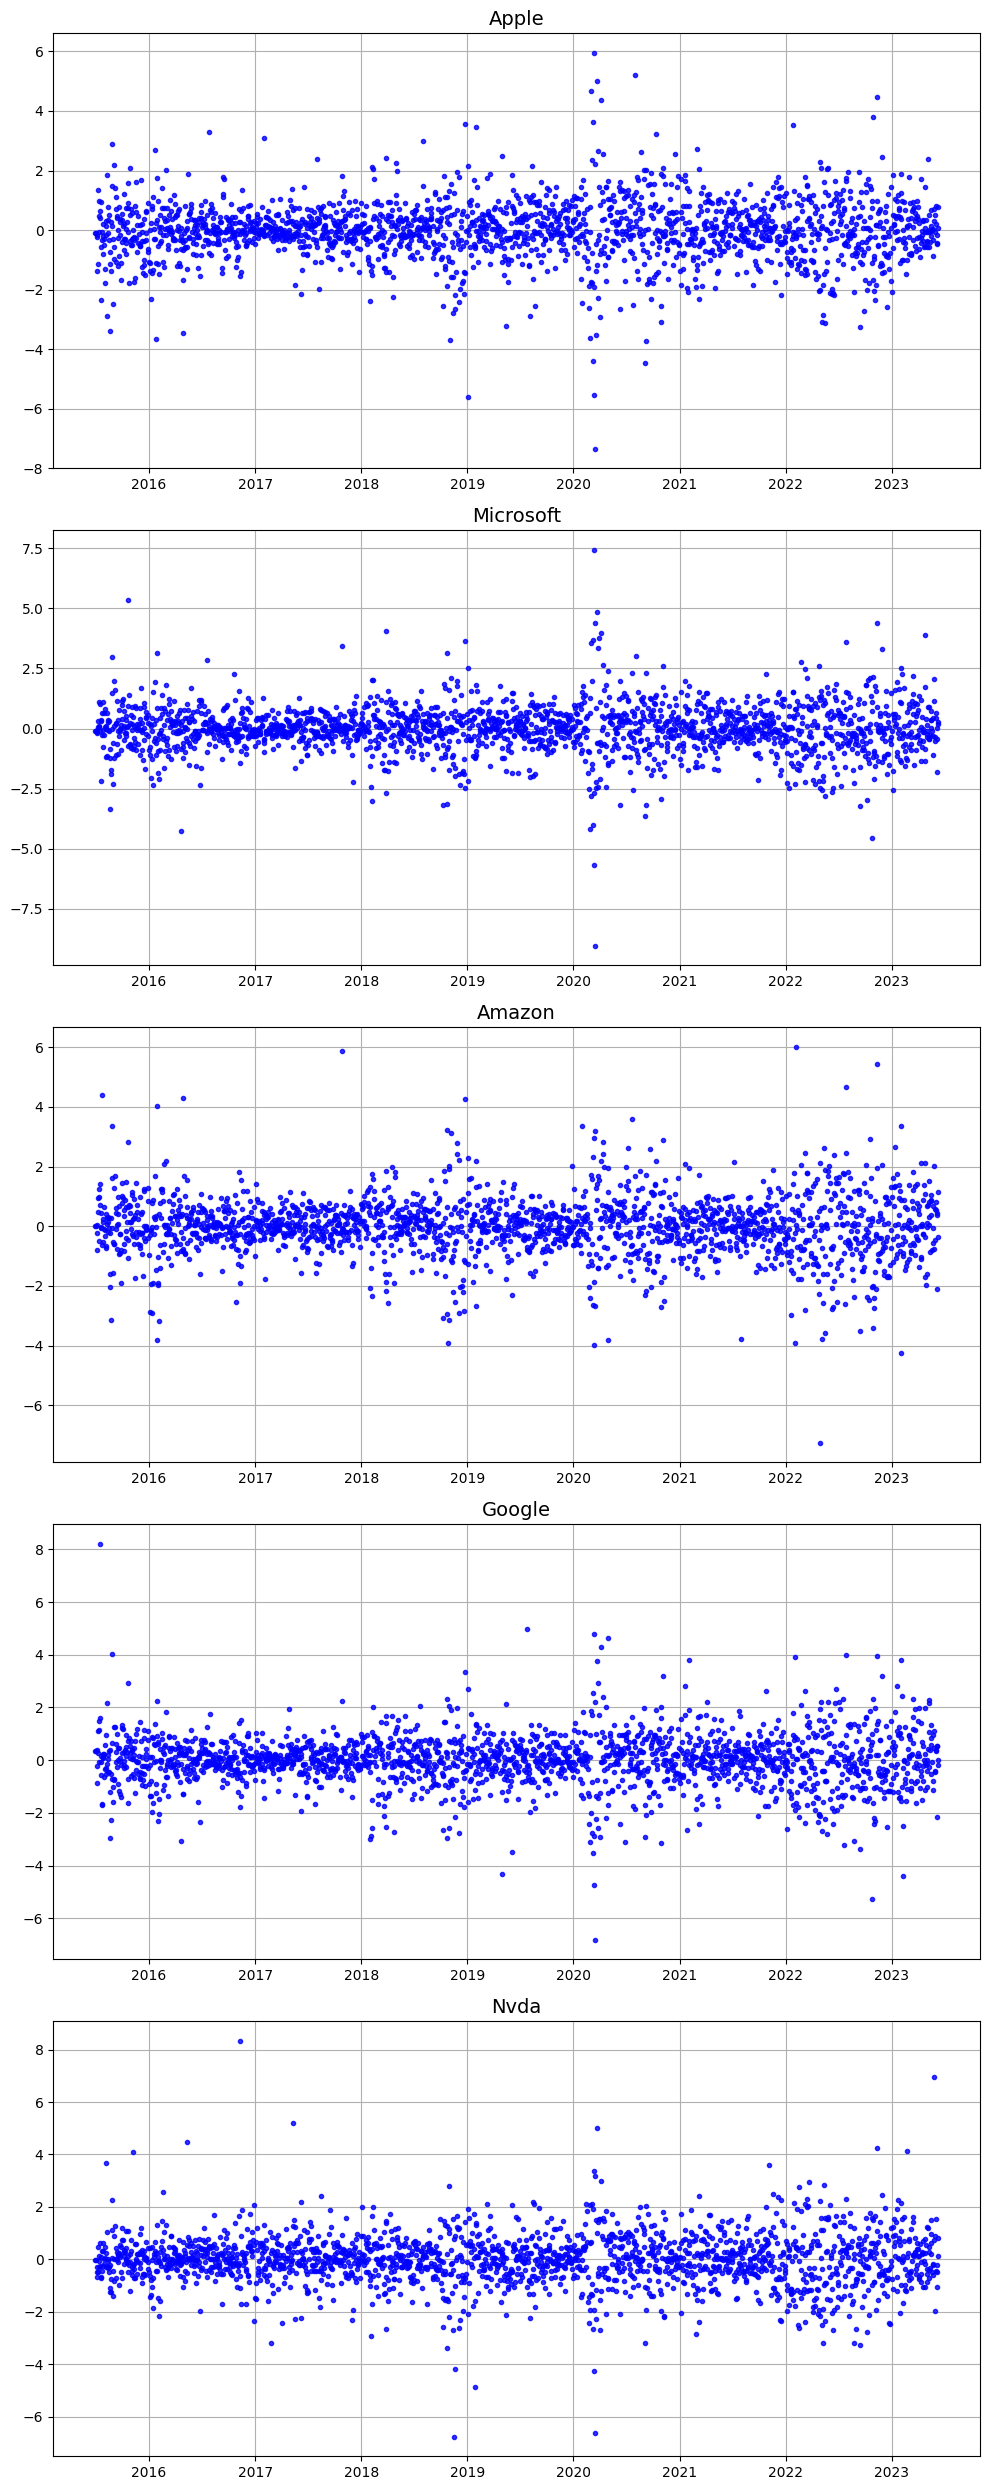

In [17]:
#put 5 subplots in orizontal

fig, axs = plt.subplots(5, figsize=(10, 25))  # Adjust figsize as needed for 5 subplots
colour="blue"
axs[0].plot(data_aapl['Date'], data_aapl['Close_logdiff'], '.', color=colour, alpha=0.8)
axs[1].plot(data_msft['Date'], data_msft['Close_logdiff'], '.', color=colour, alpha=0.8)
axs[2].plot(data_amzn['Date'], data_amzn['Close_logdiff'], '.', color=colour, alpha=0.8)
axs[3].plot(data_googl['Date'], data_googl['Close_logdiff'], '.', color=colour, alpha=0.8)
axs[4].plot(data_nvda['Date'], data_nvda['Close_logdiff'], '.', color=colour, alpha=0.8)

axs[0].set_title("Apple", fontsize=14)  
axs[1].set_title("Microsoft", fontsize=14)
axs[2].set_title("Amazon", fontsize=14)
axs[3].set_title("Google", fontsize=14)
axs[4].set_title("Nvda", fontsize=14)

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[3].grid(True)
axs[4].grid(True)



plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()
